In [1]:
# Import all required libraries

%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import random
from sklearn.datasets import load_digits
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
import warnings
#warnings.filterwarnings("ignore")
#import scikitplot as skplt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow.keras.backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [3]:
# Import data set
data = pd.read_csv('/content/HW3-Q2.csv')

In [4]:
# Defining Independent and Target variable
X = data.drop(['Unnamed: 0','spam'], axis = 1)
y = data['spam']

## Train Test Split

In [5]:
# Split of 0.33 as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Decision Tree, KNN, Logistic Regression and SVM models

### Establishing Hyperparameters

In [6]:
# Decision Tree
dt_criterion = ['gini','entropy']
dt_splitter = ['best', 'random']
dt_max_depth = range(1,4)
dt_min_samples_leaf = range(1,6)

# KNN
knn_range = list(range(1,8))
knn_weights = ["uniform", "distance"]

# Provide weights to create a cost-sensitive model
weight = {0:10, 1:1}

# Parameter Grid
dt_grid = dict(criterion = dt_criterion , splitter = dt_splitter, max_depth = dt_max_depth, min_samples_leaf = dt_min_samples_leaf)
knn_grid = dict(kneighborsclassifier__n_neighbors = knn_range, kneighborsclassifier__weights = knn_weights)
lr_grid =  [{'penalty': ['l2','l1'], 'solver': ['liblinear'],
             'C': [ 10, 1, 0.1]}]
svm_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}


In [7]:
scoring = 'accuracy'

# Classifiers
dt = DecisionTreeClassifier(class_weight = weight)
knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier()) # Normalization for KNN model
lr = LogisticRegression(max_iter = 10000, class_weight = weight)
svm = SVC(class_weight = weight)

### Grid Search

In [8]:
np.random.seed(11)

i = 1
inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

dt_clf = GridSearchCV(estimator = dt, param_grid = dt_grid, scoring = scoring, cv = inner_cv)
knn_clf = GridSearchCV(estimator = knn, param_grid = knn_grid, scoring = scoring, cv = inner_cv)
lr_clf = GridSearchCV(estimator = lr, param_grid = lr_grid, scoring = scoring, cv = inner_cv)
svm_clf = GridSearchCV(estimator = svm, param_grid = svm_grid, scoring = scoring, cv = inner_cv)

dt_score = cross_val_score(dt_clf, X = X_train, y = y_train, cv = outer_cv)
dt_score_mean = dt_score.mean()
knn_score = cross_val_score(knn_clf, X = X_train, y = y_train, cv = outer_cv)
knn_score_mean = knn_score.mean()
lr_score = cross_val_score(lr_clf, X = X_train, y = y_train, cv = outer_cv)
lr_score_mean = lr_score.mean()
svm_score = cross_val_score(svm_clf, X = X_train, y = y_train, cv = outer_cv)
svm_score_mean = svm_score.mean()

### Model Results

In [15]:
print('Accuracy \nDecision Tree:', round(dt_score_mean,3), '\nKNN:', round(knn_score_mean,5),'\nLogistic Regression:', round(lr_score_mean,3), '\nSVM:', round(svm_score_mean,3))

Accuracy 
Decision Tree: 0.813 
KNN: 0.89974 
Logistic Regression: 0.857 
SVM: 0.871


## Ensemble Models - Gradient Boosting and Random Forest

### Establishing Hyperparameters

In [11]:
# Gradient Boosting
gb_n_estimators = [100,200]

# Random Forest
rf_criterion = ['gini','entropy']
rf_n_estimators = [100, 120]
rf_min_samples_leaf = range(1,6)

# Parameter Grid
gb_grid = dict(n_estimators = gb_n_estimators)
rf_grid = dict(n_estimators = rf_n_estimators, criterion = rf_criterion, min_samples_leaf = rf_min_samples_leaf)

# Classifiers
gb = GradientBoostingClassifier()
rf = RandomForestClassifier(class_weight = weight)

### Grid Search

In [12]:
gb_clf = GridSearchCV(estimator = gb, scoring = scoring, param_grid = gb_grid, cv = inner_cv)
rf_clf = GridSearchCV(estimator = rf, scoring = scoring, param_grid = rf_grid, cv = inner_cv)

gb_score = cross_val_score(gb_clf, X = X_train, y = y_train, cv=outer_cv)
gb_score_mean = gb_score.mean()
rf_score = cross_val_score(rf_clf, X = X_train, y = y_train, cv=outer_cv)
rf_score_mean = rf_score.mean()

### Model Results

In [14]:
print('Accuracy \nGradient Boosting: ', round(gb_score_mean,3), '\nRandom Forest: ', round(rf_score_mean,3))

Accuracy 
Gradient Boosting:  0.944 
Random Forest:  0.946


## Neural Network

In [16]:
def create_model(activation='relu', nb_hidden1=10, nb_hidden2 = 20, nb_hidden3 = 30):
    model = Sequential()
    model.add(Dense(nb_hidden1, input_dim=57, activation=activation))
    model.add(Dense(nb_hidden2, input_dim=57, activation=activation))
    model.add(Dense(nb_hidden3, input_dim=57, activation=activation))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    input_shape = X_train.shape
    model.build(input_shape)
    return model

In [18]:
nb_activations = ['relu', 'tanh', 'sigmoid', 'linear']
nb_hiddens1 = np.array([100, 200])
nb_hiddens2 = np.array([100, 200])
nb_hiddens3 = np.array([100, 200])

nb = make_pipeline(MinMaxScaler(),KerasClassifier(build_fn=create_model, verbose=0, epochs=2, batch_size=100, class_weight = weight)) # Normalization

# Parameter Grid
nb_grid = dict(kerasclassifier__activation= nb_activations, kerasclassifier__nb_hidden1= nb_hiddens1, kerasclassifier__nb_hidden2= nb_hiddens2, kerasclassifier__nb_hidden3= nb_hiddens3)

# Grid Search
nb_clf = GridSearchCV(estimator= nb, param_grid= nb_grid, cv=4, scoring= scoring)

nb_score = cross_val_score(nb_clf, X = X_train, y = y_train, cv=outer_cv)
nb_score_mean = nb_score.mean()

# Model Results
print('Accuracy \nNeural Network: ', round(nb_score_mean,3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Accuracy 
Neural Network:  0.746


## Model Results

In [20]:
print('Accuracy \nDecision Tree:', round(dt_score_mean,3), '\nKNN:', round(knn_score_mean,5),'\nLogistic Regression:', round(lr_score_mean,3), '\nSVM:', round(svm_score_mean,3), \
       '\nGradient Boosting: ', round(gb_score_mean,3), '\nRandom Forest: ', round(rf_score_mean,3), \
       '\nNeural Network: ', round(nb_score_mean,3))
a = ['Decision Tree', 'KNN', 'Logistic Regression', 'SVM Classifier', 'Gradient Boosting', 'Random Forest', 'Neural Network']
b = [round(dt_score_mean,3), round(knn_score_mean,3), round(lr_score_mean,3), round(svm_score_mean,3), round(gb_score_mean,3), round(rf_score_mean,3), round(nb_score_mean,3)]

Accuracy 
Decision Tree: 0.813 
KNN: 0.89974 
Logistic Regression: 0.857 
SVM: 0.871 
Gradient Boosting:  0.944 
Random Forest:  0.946 
Neural Network:  0.746


#### I have not considered KNN and Gradient Boosting for model comparison since weights can not be assigned in these models. Hence, comparing them with other models that have class weights would not be justified.

## Best performing model - Random Forest

In [21]:
rf_clf = GridSearchCV(estimator = rf, param_grid = rf_grid, scoring = scoring, cv = inner_cv)

rf_clf.fit(X_train, y_train)
print('Best Estimator (Hyperparameters):\n', rf_clf.best_params_)

Best Estimator (Hyperparameters):
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}


## Classification Report

In [22]:
y_predict_test = rf_clf.predict(X_test)
target_names = ['Non-Spam','Spam']
print('Confusion Matrix: \n',confusion_matrix(y_test,y_predict_test))
print('Overall Accuracy: \n',round(accuracy_score(y_test,y_predict_test),3))
print(classification_report(y_test, y_predict_test, target_names=target_names))

Confusion Matrix: 
 [[892  34]
 [ 37 556]]
Overall Accuracy: 
 0.953
              precision    recall  f1-score   support

    Non-Spam       0.96      0.96      0.96       926
        Spam       0.94      0.94      0.94       593

    accuracy                           0.95      1519
   macro avg       0.95      0.95      0.95      1519
weighted avg       0.95      0.95      0.95      1519



#### The best performing model - Random Forest gives a precision of 0.96 for Non-Spam class and 0.94 for Spam class. Recall is 0.96 and 0.94 with a F-score of 0.96 and 0.93 for Non-Spam and Spam classes respectively. Overall accuracy of the model is 0.95.

## ROC and Lift Curve

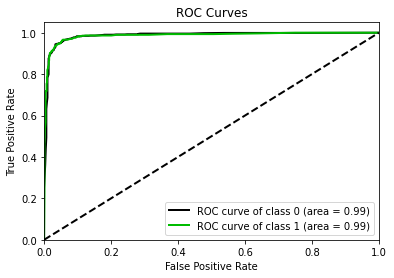

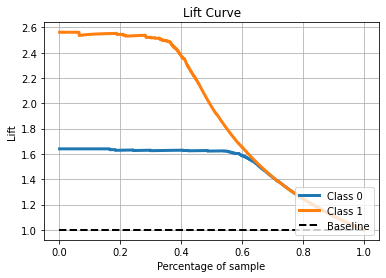

In [25]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, rf_clf.predict_proba(X_test), plot_micro = False, plot_macro = False)
skplt.metrics.plot_lift_curve(y_test, rf_clf.predict_proba(X_test))
plt.show()

#### The ROC curve gives an almost perfect curve. After the True Positive Rate reached about 0.9, we started getting a False Positive Rate which is a significant number. For Class 1 (Spam), the Lift Curve gives a value of about 2.6 which indicates that there is a more than 1.6 times better chance of the model correctly predicting than a random chance/guess.

## Setting Threshold for Misclassification Cost

In [26]:
predict_probabilities = rf_clf.predict_proba(X_test)[:,1]

# Prediction probability of label 1  
thresholds = np.linspace(0, 1.0, num=21) 
cost_list=np.linspace(0, 1.0, num=21) 

# Input cost matrix 
cost_matrix = np.array([[0, 10], [1, 0]]) 
index=0 
for t in thresholds: 
   predict_thre = np.where(predict_probabilities > t, 1, 0)  
   clf_matrix = confusion_matrix(y_test, predict_thre) 
   cost_list[index] = (clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1])/clf_matrix.sum()
   index+=1 

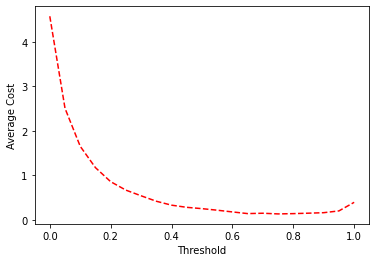

In [28]:
plt.figure(1) 
plt.plot(thresholds, cost_list, 'r--') 
plt.xlabel("Threshold") 
plt.ylabel("Average Cost") 
plt.show() 

#### Lowest average misclassification cost is nearly at threshold 0.7. At this threshold, we would classify all the probabilities greater than or equal to 0.7 as Class 1 (Spam) and all the values < 0.7 as Class 0 (Non-Spam).


## Threshold = 0.7

In [31]:
# Running the Random Forest model again with threshold at 0.7
threshold = 0.7
predict_proba = rf_clf.predict_proba(X_test)
predicted = (predict_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

# Reference: https://stackoverflow.com/questions/49785904/how-to-set-threshold-to-scikit-learn-random-forest-model

In [32]:
print('Accuracy at threshold 0.7: ', round(accuracy,3))

Accuracy at threshold 0.7:  0.936
